### Problem Statement:
> In the real estate industry, it can be so complicated to determine a house price. That is because it depends on so many characterestics of the house itself. Therefore, in this project, we aquired a dataset containing 79 explanatory features describing almost every aspect of residential homes in Ames, Iowa, USA. After that, we built some regression models to predict each house price. Then, we selected the best model in terms of the test data score provided by Kaggle.

In [2]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
%matplotlib inline


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


import warnings
warnings.filterwarnings('ignore')

### Data Cleaning and EDA

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### print the head of train and test data

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### print summary statistics

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


#### SalePrice distribution

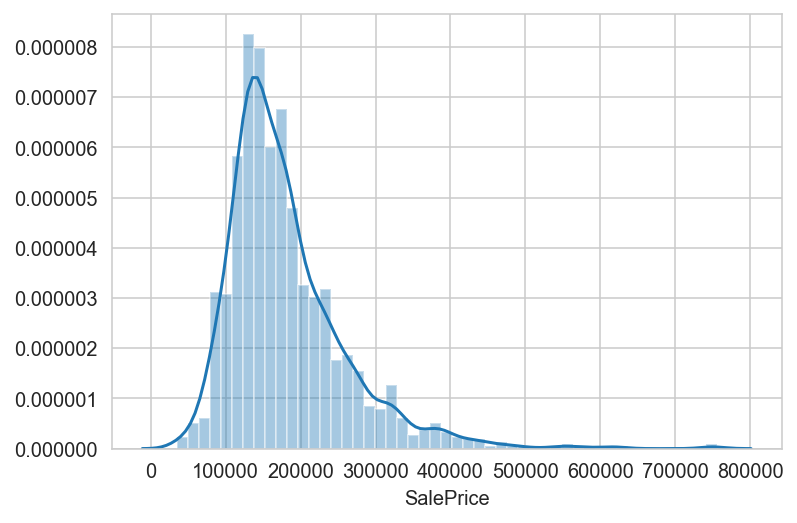

In [9]:
sns.distplot(df_train['SalePrice'])

The target variable is right skewed

#### Display the data types of each feature in train and test datasets

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#### Display the columns with null values and number of nulls

In [12]:
df =pd.DataFrame()
df['null'] =  pd.Series(df_train.isnull().sum())
df = df[df.null != 0]
df.sort_values(by= 'null',ascending= False )

,null
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


#### Display bar plot for number of missing data by feature

Text(0.5, 1.0, 'Number missing data by feature')

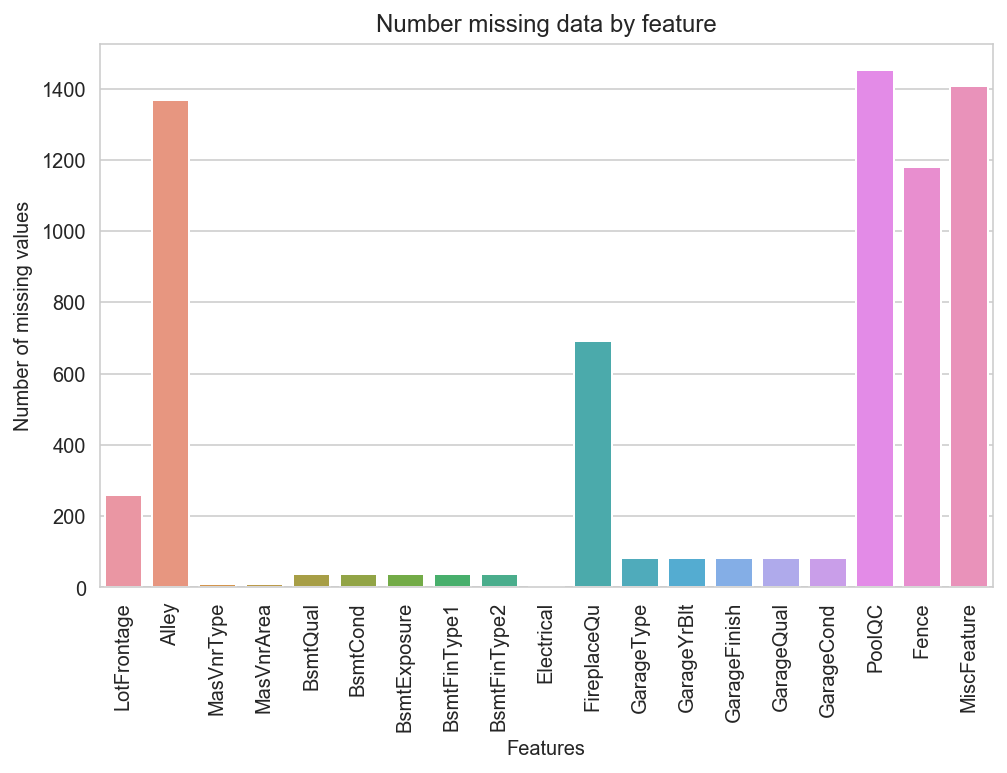

In [13]:
f, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation='90')
sns.barplot(x=df.index, y=df['null'])
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Number missing data by feature')

##### Replacing missing values with None in these columns the missing values means that it doesn't exist

In [14]:
# Replacing missing values with None 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','PoolQC','MiscFeature','FireplaceQu'
            ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSSubClass','Alley','Fence'):
    df_train[col] = df_train[col].fillna('None')
#
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','PoolQC','MiscFeature','FireplaceQu'
            ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSSubClass','Alley','Fence'):
    df_test[col] = df_test[col].fillna('None')

#### Replacing missing values with 0 in these columns the missing values means that it does not exist, it is related to something such as garage or basement so if these are not exist the values related to it does not exist too 

In [15]:
#Replacing missing values with 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'MasVnrArea',
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)
#
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1','MasVnrArea', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test[col] = df_test[col].fillna(0)

#### Replacing missing values with median of LotFrontage for each neighborhood (group by)

In [16]:
#Replacing missing values with median 
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### Replacing missing values with Typ because data description says NA means typical

In [17]:
#Functional
df_train["Functional"] = df_train["Functional"].fillna("Typ")
#
df_test["Functional"] = df_test["Functional"].fillna("Typ")

As we see in the result below the Utilities column has two values: all records are "AllPub", except for one "NoSeWa" and 2 NA, therefore the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. So we can then safely remove it

In [18]:
print (df_train['Utilities'].value_counts())
print (df_test['Utilities'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1457
Name: Utilities, dtype: int64


In [19]:
#Drop utilities
df_train = df_train.drop(['Utilities'], axis=1)
#
df_test = df_test.drop(['Utilities'], axis=1)

#### Replacing missing values with most frequent string (mode)

In [20]:
# Replacing missing values with mode 
for col in ('SaleType','Exterior2nd','Exterior1st','KitchenQual','Electrical','MSZoning'):
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    
for col in ('SaleType','Exterior2nd','Exterior1st','KitchenQual','Electrical','MSZoning'):
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

#### Recheck remaining missing values if any

In [21]:
#Recheck remaining missing values if any
df =pd.DataFrame()
df['null'] =  pd.Series(df_train.isnull().sum())
df = df[df.null != 0]
df

,null


#### Drop the 'Id' colum since it's unnecessary for  the prediction process

In [22]:
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#dropping Id 
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1460, 80) 
The test data size before dropping Id feature is : (1459, 79) 

The train data size after dropping Id feature is : (1460, 79) 
The test data size after dropping Id feature is : (1459, 78) 


#### Correlation map to see how features are correlated with SalePrice

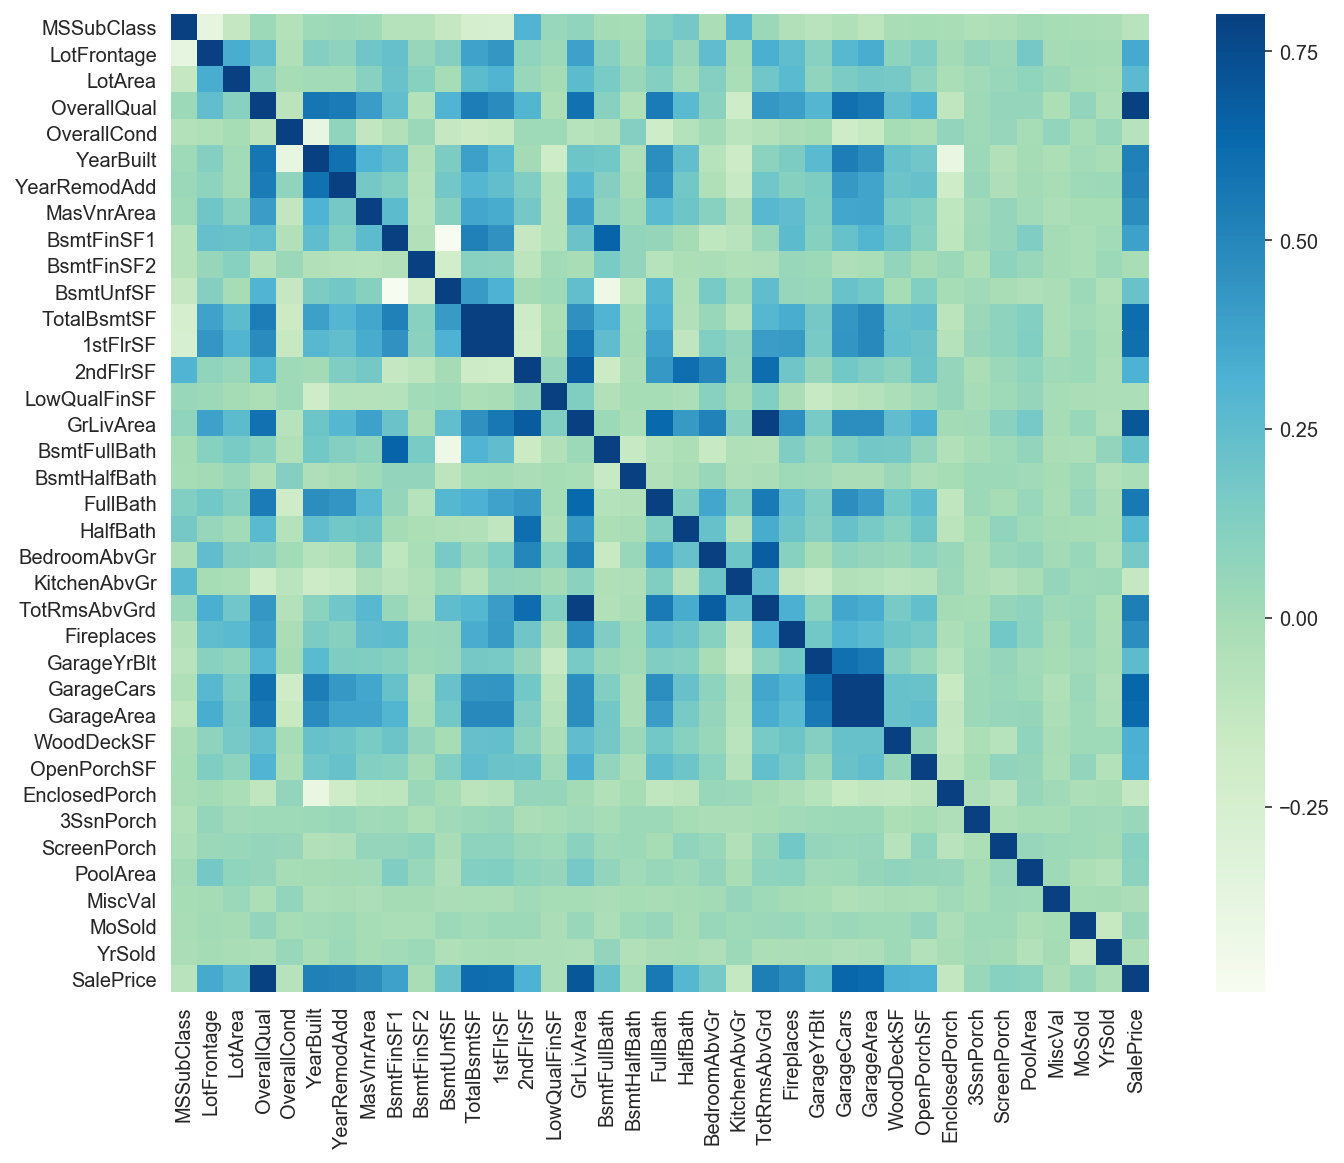

In [23]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='GnBu')

#### Correlation map for top 15 features correlated with SalePrice

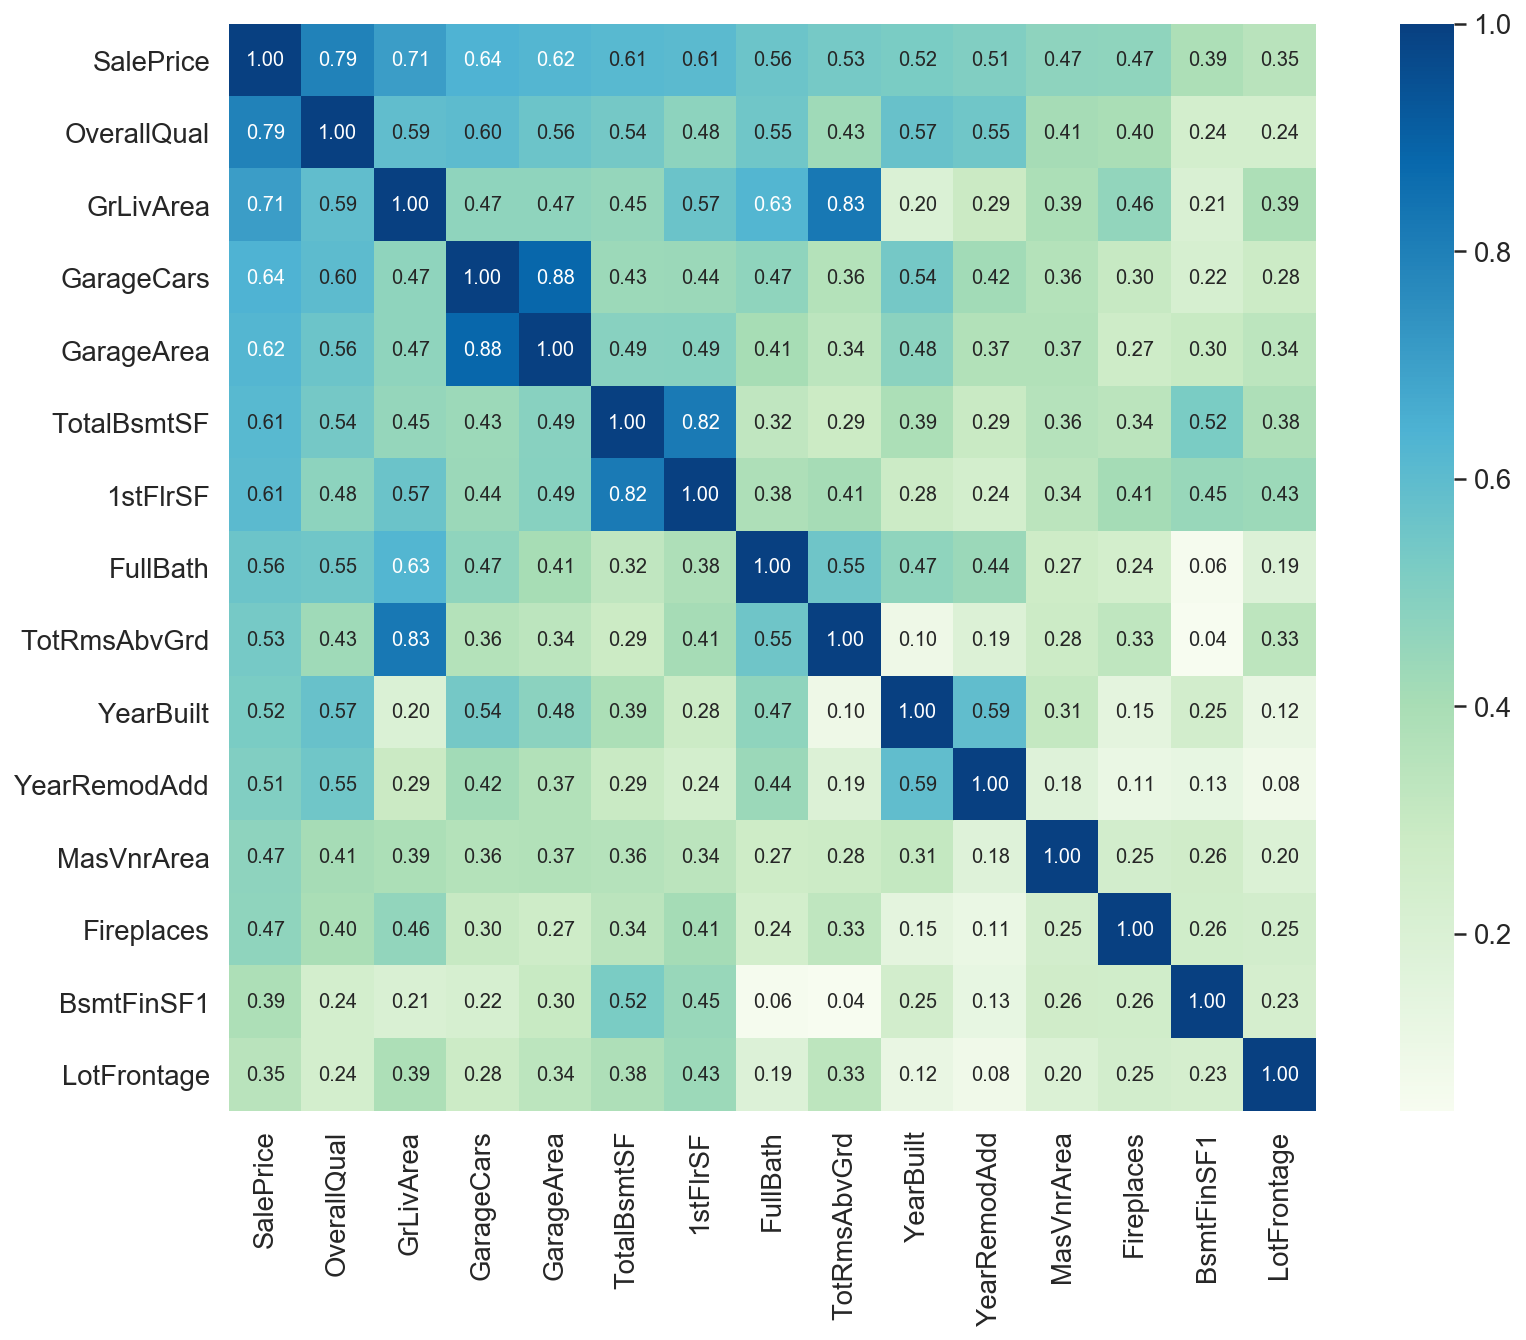

In [24]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap='GnBu')
plt.show()

#### Display box plots for all categorical features to see which ones has strong correlation with SalePrice

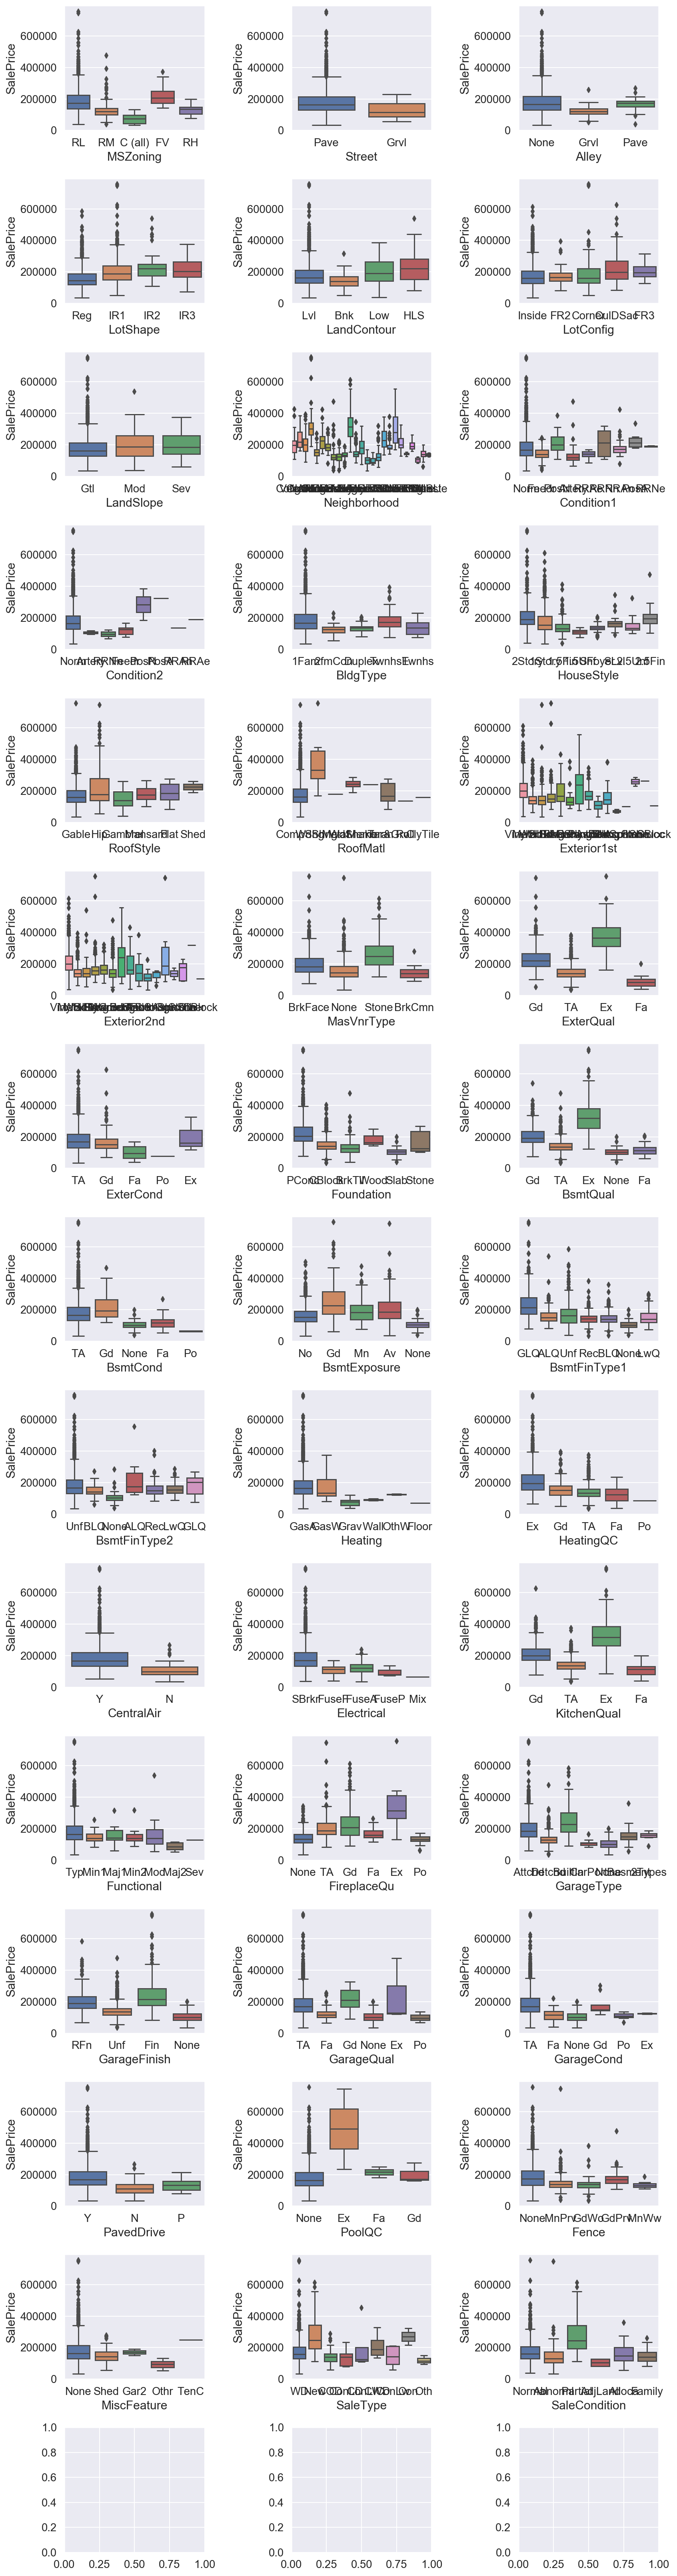

In [25]:
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=df_train, ax = axs[r][c])
plt.tight_layout()
plt.show()

#### Display list for categorical features which has strong correlation with SalePrice that we have extract it manually 

In [26]:
atg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType','FireplaceQu', 'GarageQual']
num_Strong_corr = [cols]

#### We change each string in the categorical features that strongly correlated with SalePrice to numbers 

In [27]:
for df in [df_train, df_test]:
    df['MSZ_num'] = 1
    df.loc[(df['MSZoning']=='RH' ), 'MSZ_num'] = 2
    df.loc[(df['MSZoning']== 'RM' ), 'MSZ_num'] = 3
    df.loc[(df['MSZoning']== 'RL' ), 'MSZ_num'] = 4
    df.loc[(df['MSZoning']=='FV' ), 'MSZ_num'] = 5

    
for df in [df_train, df_test]:
    df['NbHd_num'] = 1
    df.loc[(df['Neighborhood']== 'Blmngtn'), 'NbHd_num'] = 2
    df.loc[(df['Neighborhood']==  'ClearCr'), 'NbHd_num'] = 3
    df.loc[(df['Neighborhood']==  'CollgCr'), 'NbHd_num'] = 4
    df.loc[(df['Neighborhood']==  'Crawfor'), 'NbHd_num'] = 5
    df.loc[(df['Neighborhood']==   'Gilbert'), 'NbHd_num'] = 6
    df.loc[(df['Neighborhood']==  'NWAmes'), 'NbHd_num'] = 7
    df.loc[(df['Neighborhood']==  'Somerst'), 'NbHd_num'] = 8
    df.loc[(df['Neighborhood']==  'Timber'), 'NbHd_num'] = 9
    df.loc[(df['Neighborhood']==  'Veenker'), 'NbHd_num'] = 10
    df.loc[(df['Neighborhood']== 'NoRidge' ), 'NbHd_num'] = 11
    df.loc[(df['Neighborhood']== 'NridgHt' ), 'NbHd_num'] = 12
    df.loc[(df['Neighborhood']== 'StoneBr' ), 'NbHd_num'] = 13


for df in [df_train, df_test]:
    df['Cond2_num'] = 1
    df.loc[(df['Condition2']=='Norm' ), 'Cond2_num'] = 2
    df.loc[(df['Condition2']=='RRAe' ), 'Cond2_num'] = 3
    df.loc[(df['Condition2']=='PosA'), 'Cond2_num'] = 4
    df.loc[(df['Condition2']=='PosN'), 'Cond2_num'] = 5

for df in [df_train, df_test]:
    df['Mas_num'] = 1
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2
    
for df in [df_train, df_test]:
    df['ExtQ_num'] = 1
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4
    
for df in [df_train, df_test]:
    df['BsQ_num'] = 1
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3
    
for df in [df_train, df_test]:
    df['CA_num'] = 0
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1
    
for df in [df_train, df_test]:
    df['Elc_num'] = 1
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2
    
for df in [df_train, df_test]:
    df['KiQ_num'] = 1
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4
    
for df in [df_train, df_test]:
    df['SlTy_num'] = 1
    df.loc[(df['SaleType']=='Oth'), 'SlTy_num'] = 2
    df.loc[(df['SaleType']=='CWD'), 'SlTy_num'] = 3
    df.loc[(df['SaleType']=='Con' ), 'SlTy_num'] = 4
    df.loc[(df['SaleType']=='New' ), 'SlTy_num'] = 5
    

for df in [df_train, df_test]:
    df['FireplaceQu_num'] = 1
    df.loc[(df['FireplaceQu']=='Gd'), 'FireplaceQu_num'] = 2
    df.loc[(df['FireplaceQu']=='TA'), 'FireplaceQu_num'] = 3
    df.loc[(df['FireplaceQu']=='Fa' ), 'FireplaceQu_num'] = 4
    df.loc[(df['FireplaceQu']=='Ex' ), 'FireplaceQu_num'] = 5
    df.loc[(df['FireplaceQu']=='Po' ), 'FireplaceQu_num'] = 6
    
for df in [df_train, df_test]:
    df['GarageQual_num'] = 1
    df.loc[(df['GarageQual']=='None'), 'GarageQual_num'] = 2
    df.loc[(df['GarageQual']=='Fa'), 'GarageQual_num'] = 3
    df.loc[(df['GarageQual']=='Gd' ), 'GarageQual_num'] = 4
    df.loc[(df['GarageQual']=='Po' ), 'GarageQual_num'] = 5
    df.loc[(df['GarageQual']=='Ex' ), 'GarageQual_num'] = 6

#### Create two datasets that are contains only numeric values

In [28]:
isNumeric_train = df_train._get_numeric_data()
isNumeric_test = df_test._get_numeric_data()

#### Correlation map to see how features are correlated with SalePrice "contains categorical features that we converted it before"

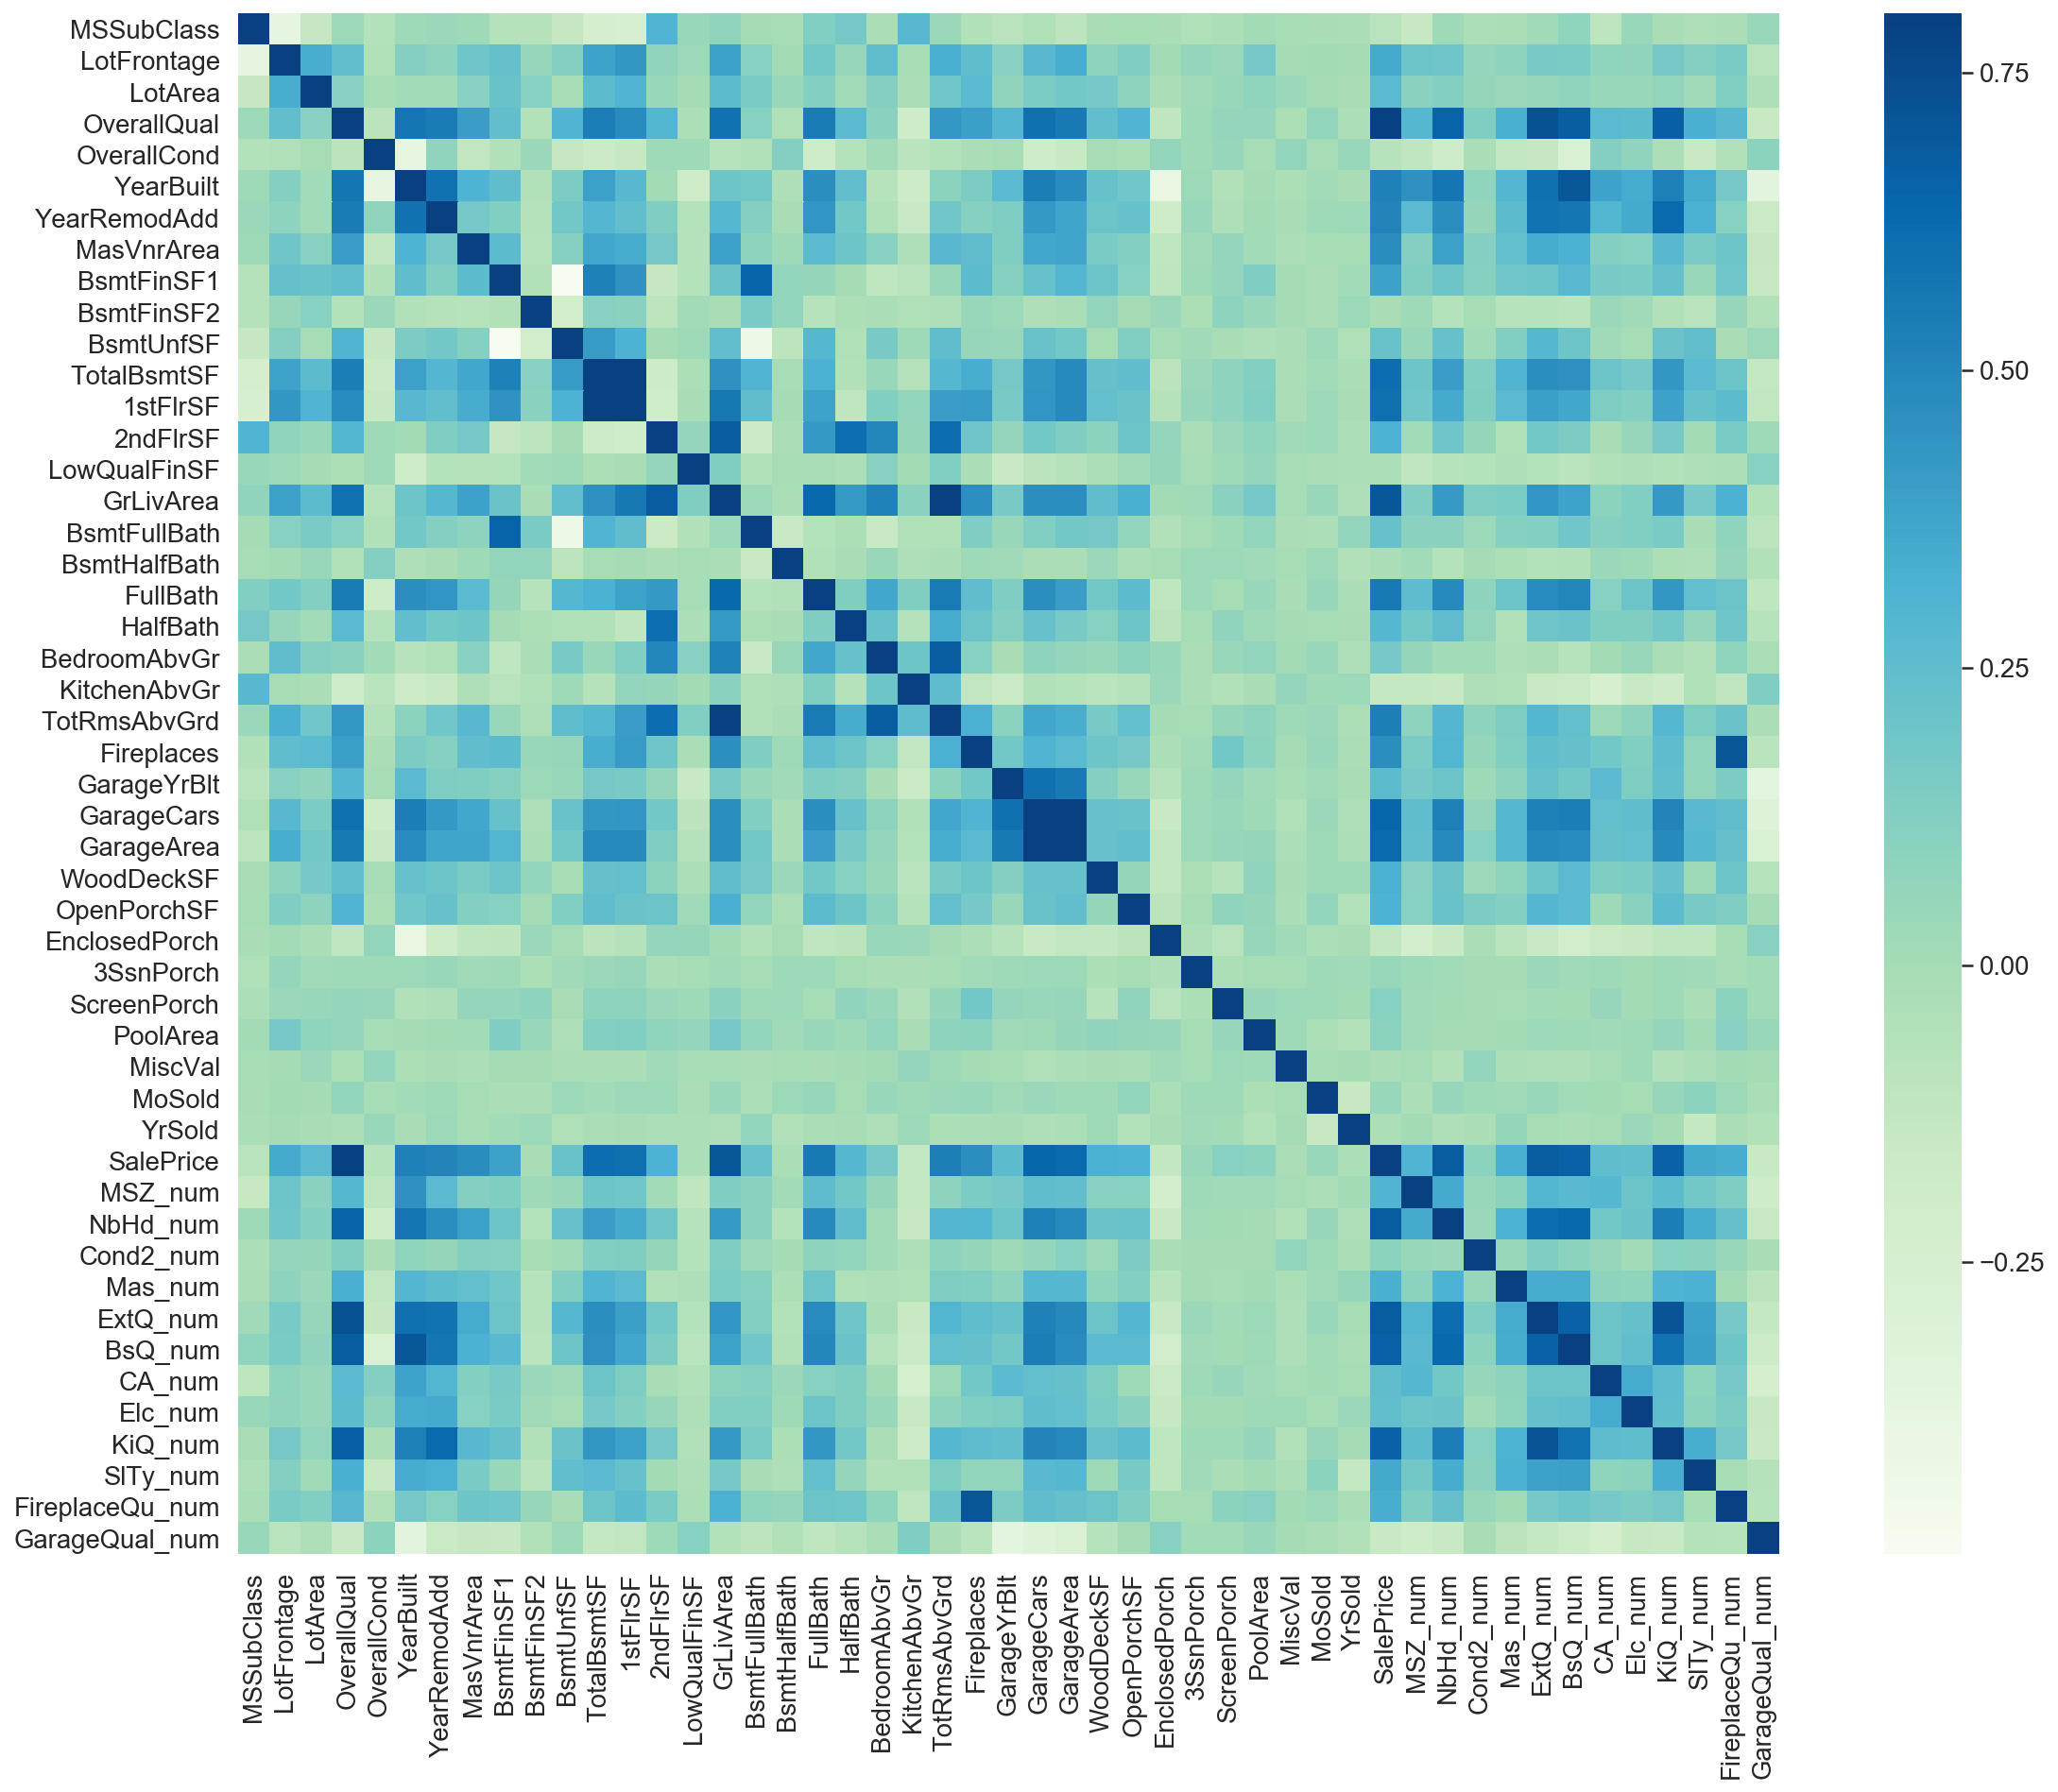

In [29]:
corrmat = isNumeric_train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8,square=True,cmap='GnBu')
# cbar=True, annot=True, square=True

#### Correlation map for top 15 features correlated with SalePrice "contains categorical features that we converted it before"

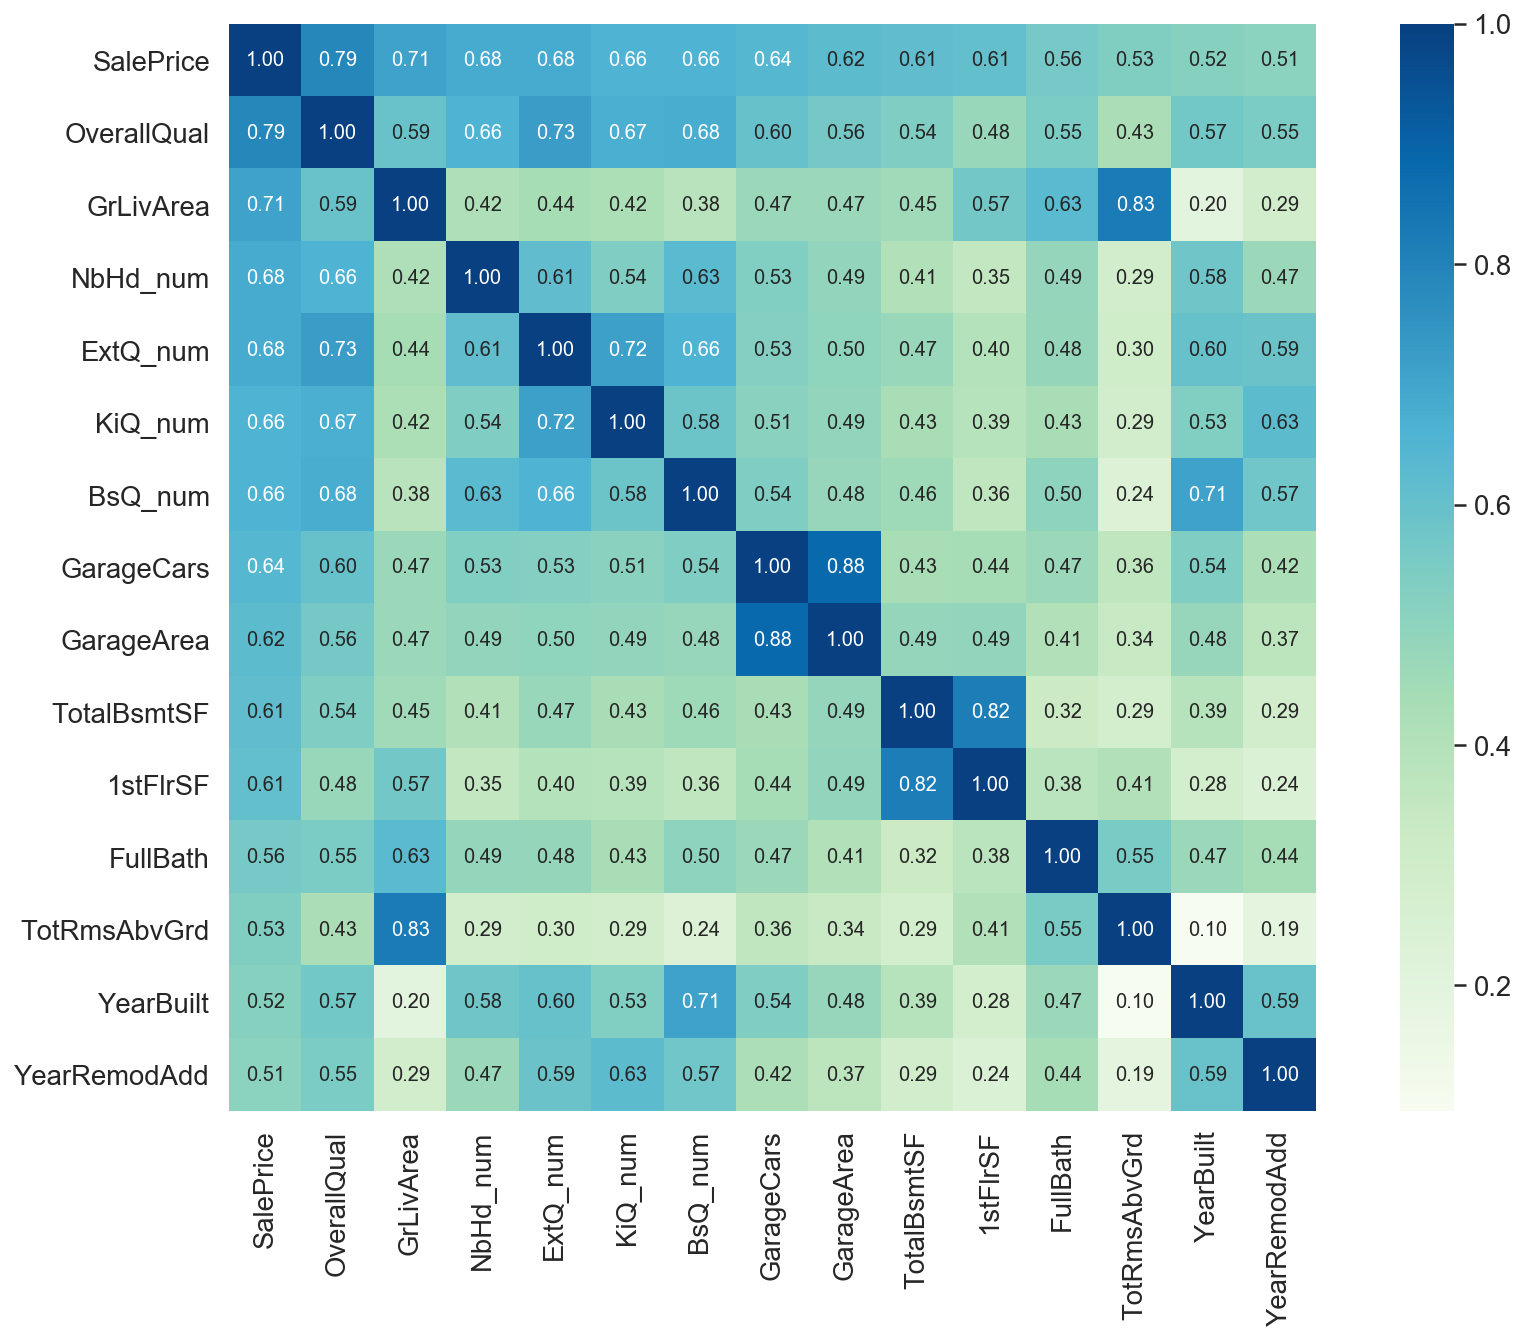

In [30]:

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(isNumeric_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap='GnBu')
plt.show()

#### Defind outliers

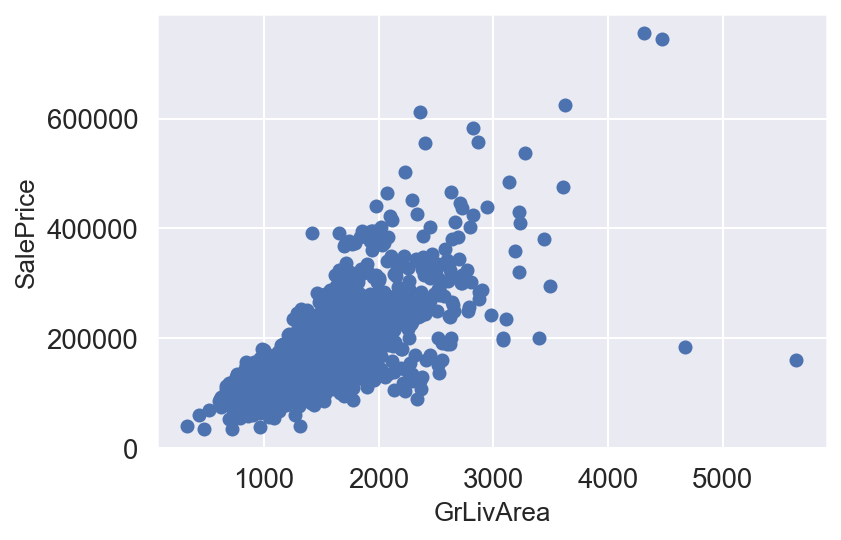

In [31]:
#defind outliers
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('')
plt.show()

at the bottom right two with extremely large GrLivArea that are of a low price! These values are huge outliers. Therefore, we can safely delete them

#### Deleting outliers

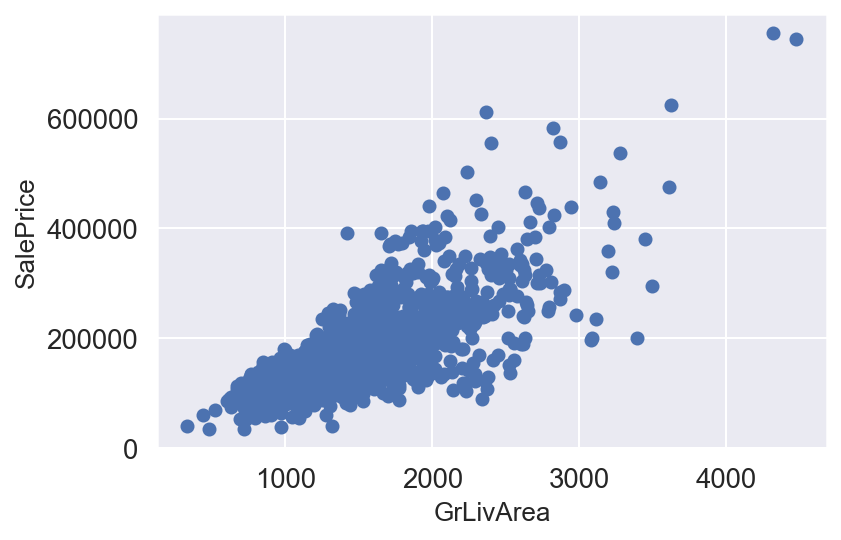

In [32]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Preprocessing and Modeling

In [53]:
#function to create csv file
def create_csv_predictions(predictions, file_name):
    
    predictions=pd.DataFrame(predictions)
    predictions['Id']= [i for i in range(1461, 2920)]
    predictions.set_index('Id',inplace=True)
    predictions.rename(columns={0:'SalePrice'},inplace = True)
    predictions.to_csv(file_name)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
X_train= isNumeric_train[['OverallQual','GrLivArea','ExtQ_num','NbHd_num','KiQ_num','BsQ_num','TotalBsmtSF','GarageCars','1stFlrSF','GarageArea','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
y_train= isNumeric_train['SalePrice']

In [35]:
X_test= isNumeric_test[['OverallQual','GrLivArea','ExtQ_num','NbHd_num','KiQ_num','BsQ_num','TotalBsmtSF','GarageCars','1stFlrSF','GarageArea','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]


#### We imported StandardScaler and applied it to both X_train and X_test.

In [36]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [37]:
Model= []
R_s_training = []
mean_cv_s_5 = []

For modeling, we made multiple models and evaluated the score of the train dataset, then submitted each model in Kaggle. The best test score was for Lasso CV model.

#### In order to calculate the baseline, we used DummyRegressor. We set the predictions as a constant number, which is the mean of the target (y_train).

In [55]:
#find the score of beasline

# create a DummyRegressor model instance
dummy_constant = DummyRegressor(strategy='constant', constant=y_train.mean())

# "Train" dummy regressor
dummy_constant.fit(X_train, y_train)
dummy_constant.score(X_train, y_train)

0.0

Kaggle score


#### In this model, we created a linear regression model on the features we manually selected.

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

# create a linear regression model instance
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

#fit and evaluate the data on the whole training set
model.fit(X_train, y_train)

print("Training Score:", model.score(X_train, y_train))

Cross-validated training scores: [0.86190641 0.81823666 0.81212544 0.80584762 0.678684  ]
Mean cross-validated training score: 0.7953600277539263
Training Score: 0.8079773681188585


In [ ]:
predictions= model.predict(X_test)
create_csv_predictions(predictions, 'predictions.csv')

Kaggle score


## Another approach: using dummies

#### Load datasets again, in this part we will go with another approach here we will try dummies

In [44]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### Replacing missing values in the same way that we did above 

In [45]:

# Replacing missing values with None 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','PoolQC','MiscFeature','FireplaceQu'
            ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSSubClass','Alley','Fence'):
    df_train[col] = df_train[col].fillna('None')
#
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','PoolQC','MiscFeature','FireplaceQu'
            ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MSSubClass','Alley','Fence'):
    df_test[col] = df_test[col].fillna('None')

#Replacing missing values with 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'MasVnrArea',
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)
#
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1','MasVnrArea', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test[col] = df_test[col].fillna(0)

#Replacing missing values with median 
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


#Functional
df_train["Functional"] = df_train["Functional"].fillna("Typ")
#
df_test["Functional"] = df_test["Functional"].fillna("Typ")


#Drop utilities
df_train = df_train.drop(['Utilities'], axis=1)
#
df_test = df_test.drop(['Utilities'], axis=1)
#
for col in ('SaleType','Exterior2nd','Exterior1st','KitchenQual','Electrical','MSZoning'):
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    
for col in ('SaleType','Exterior2nd','Exterior1st','KitchenQual','Electrical','MSZoning'):
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

#### Getting all numeric features in new dataset

In [46]:
isNumeric_train = df_train._get_numeric_data()
isNumeric_test = df_test._get_numeric_data()

#### Create dummies

In [47]:
#creat dummies for categorical feats
categorical_feats = list(df_train.dtypes[df_train.dtypes == "object"].index)
categorical_train= df_train[categorical_feats]
categorical_test= df_test[categorical_feats]
dummies_train = pd.get_dummies(categorical_train)
dummies_test = pd.get_dummies(categorical_test)

#### Create new dataset contains dummies and dataset that contains numeric features that we created above

In [48]:
new_df_train= pd.concat([isNumeric_train,dummies_train], axis=1)
new_df_test= pd.concat([isNumeric_test,dummies_test], axis=1)

#### Split data to train and test 

In [49]:
X_train= new_df_train[[c for c in new_df_train if c != 'SalePrice']]
y_train= new_df_train['SalePrice']
X_test= new_df_test[[c for c in new_df_test]]


#### Display columns that is in X_train and not in X_test 

In [50]:
missing=[]
for mis in X_train.columns:
    if mis not in X_test.columns:
        missing.append(mis)

missing

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'MiscFeature_TenC']

#### Add the columns above to X_test and set it to null then replace null values with 0 , and sort the columns places 

In [51]:
for col in missing:
    X_test[col]= np.nan
    
X_test.fillna(0, inplace=True)
X_test=X_test[X_train.columns]

### Preprocessing and Modeling

#### In order to scale the data, we selected the MinMaxScaler method with the default range of (0,1).

In [54]:
#models evaluation df
evaluation = pd.DataFrame({'Model': [],
                          'R-squared (training)':[],
                          '5-Fold Cross Validation':[]})

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

#### In this model, we created a decision tree after performing a grid search. We applied the model on the entire features in X_train.

In [57]:
#gridsearch params
dtc_params = {
    'max_depth': range(1,30),
    'max_features': [None, 'log2', 'sqrt'],
    'min_samples_split': range(5,20),
    'max_leaf_nodes': [None],
    'min_samples_leaf': range(1,10)
}


# set the gridsearch
model_dtc = DecisionTreeRegressor()
model_dtc_gs = GridSearchCV(estimator=model_dtc,param_grid=dtc_params,cv=5, error_score='raise-deprecating', n_jobs=-1, verbose=1)



In [58]:
# fit the model
model_dtc_gs=model_dtc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 11745 candidates, totalling 58725 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 637 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1637 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 3037 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 4837 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 7037 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 9637 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12637 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 15280 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 21519 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 26239 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 30839 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 35223 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 40527 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 46013 tas

In [59]:
predictions= model_dtc_gs.best_estimator_.predict(X_test)
create_csv_predictions(predictions, 'predictions_dtc_gs.csv')

In [60]:
# evaluate on the training set
print('Training score:', model_dtc_gs.best_score_)

evaluation = evaluation.append({'Model' : 'dtc' ,
                                'R-squared (training)' : model_dtc_gs.best_score_, 
                                '5-Fold Cross Validation':''} ,ignore_index=True)

Training score: 0.7790336419836977


Kaggle score 


#### In this model, we created a K neighbors regressor after performing a grid search. We applied the model on the entire features in X_train.

In [61]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# gridsearch params
tuned_parameters = [{'weights': ['uniform', 'distance'],
                    'n_neighbors': range(2,100)}]
# create a GridSearchCV model instance
model_KNN = GridSearchCV(neighbors.KNeighborsRegressor(), tuned_parameters, cv=5)

In [62]:
# fit the model
model_KNN=model_KNN.fit(X_train,y_train)

In [63]:
# evaluate on the training set
print('Training score:', model_KNN.best_score_)

evaluation = evaluation.append({'Model' : 'KNN' ,
                                'R-squared (training)' : model_KNN.best_score_, 
                                '5-Fold Cross Validation':''} ,ignore_index=True)

Training score: 0.7337730322917901


In [64]:
predictions= model_KNN.best_estimator_.predict(X_test)
create_csv_predictions(predictions, 'predictions_KNN.csv')

Kaggle score 


#### In this model, we created a Lasso CV model after calculating the best alpha. We applied this model on the entire features in X_train. This model scored the highest score for test data in Kaggle.

In [65]:
# create a LassoCV model instance
model_LassoCV = LassoCV(alphas=np.logspace(-50,100, 100), cv=5)

# fit the model
model_LassoCV.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model_LassoCV.alpha_)

# evaluate on the training set
print('Training score:', model_LassoCV.score(X_train, y_train))

evaluation = evaluation.append({'Model' : 'LassoCV' ,
                                'R-squared (training)' : model_LassoCV.score(X_train, y_train), 
                                '5-Fold Cross Validation':''} ,ignore_index=True)

Best alpha: 32.745491628777316
Training score: 0.92525761495644


In [66]:
# create a Lasso model instance
model_lasso = Lasso(alpha=80)

# get cross validated scores
scores = cross_val_score(model_lasso, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model_lasso.fit(X_train, y_train)
print("Training Score:", model_lasso.score(X_train, y_train))

evaluation = evaluation.append({'Model' : 'Lasso' ,
                                'R-squared (training)' : model_lasso.score(X_train, y_train), 
                                '5-Fold Cross Validation': scores.mean()} ,ignore_index=True)

Cross-validated training scores: [0.90486405 0.83556774 0.87118646 0.89402754 0.75254899]
Mean cross-validated training score: 0.8516389549823467
Training Score: 0.9146361761313825


In [67]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model_lasso.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.head()

,coefficients,coef_abs
0,-0.000000,0.000000
1,-5011.069221,5011.069221
2,0.000000,0.000000
3,29934.172240,29934.172240
4,73091.001634,73091.001634


In [68]:
predictions=model_lasso.predict(X_test)
create_csv_predictions(predictions, 'predictions_lasso80.csv')

Kaggle score


#### In this model, we created a Ridge CV model after calculating the best alpha. We applied this model on the entire features in X_train.

In [69]:
# create a RidgeCV model instance
model_RidgeCV = RidgeCV(alphas=np.logspace(-1, 2, 10), cv=5)

# fit the model
model_RidgeCV.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model_RidgeCV.alpha_)

# evaluate on the training set
print('Training score:', model_RidgeCV.score(X_train, y_train))

evaluation = evaluation.append({'Model' : 'RidgeCV' ,
                                'R-squared (training)' : model_RidgeCV.score(X_train, y_train), 
                                '5-Fold Cross Validation':''} ,ignore_index=True)

Best alpha: 10.0
Training score: 0.8922239879129015


In [70]:
# create a Ridge model instance
model_Ridge = Ridge(alpha=1000)

# get cross validated scores
scores = cross_val_score(model_Ridge, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model_Ridge.fit(X_train, y_train)
print("Training Score:", model_Ridge.score(X_train, y_train))

evaluation = evaluation.append({'Model' : 'Ridge' ,
                                'R-squared (training)' : model_Ridge.score(X_train, y_train), 
                                '5-Fold Cross Validation': scores.mean()} ,ignore_index=True)

Cross-validated training scores: [0.64995596 0.60890989 0.54524308 0.64338101 0.54495128]
Mean cross-validated training score: 0.5984882442920291
Training Score: 0.6319847297953811


In [71]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model_Ridge.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.head()

,coefficients,coef_abs
0,-586.368096,586.368096
1,-1749.637629,1749.637629
2,1488.189382,1488.189382
3,884.906994,884.906994
4,5749.710345,5749.710345


In [72]:
predictions=model_Ridge.predict(X_test)
create_csv_predictions(predictions, 'predictions_model_Ridge_1000.csv')

Kaggle score


#### We created a dataframe for the predictions and formatted it as required by Kaggle.

In [73]:
predictions=pd.DataFrame(predictions)
predictions['Id']= [i for i in range(1461, 2920)]
predictions.set_index('Id')
predictions.rename(columns={'0':'SalePrice'},inplace = True)

In [74]:
predictions.rename(columns={0:'SalePrice'},inplace = True)

In [75]:
predictions.set_index('Id',inplace=True)
predictions.head()

,SalePrice
Id,
1461,122426.523954
1462,164465.740622
1463,197842.104743
1464,223247.622062
1465,188647.288581


In [76]:
evaluation

,Model,R-squared (training),5-Fold Cross Validation
0,dtc,0.779034,
1,KNN,0.733773,
2,LassoCV,0.925258,
3,Lasso,0.914636,0.851639
4,RidgeCV,0.892224,
5,Ridge,0.631985,0.598488


## Conclusion and Recommendations

Text(0.5, 1.0, 'Strongest Features')

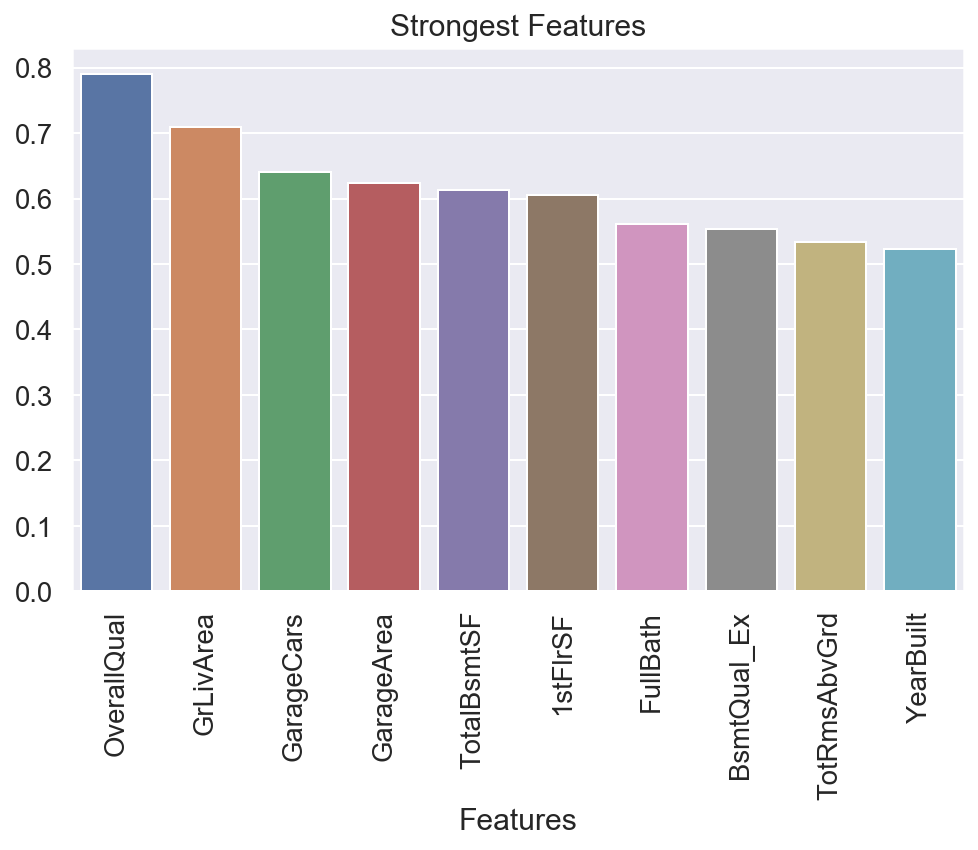

In [109]:
corrmat = new_df_train.corr()
k = 11
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_df_train[cols].values.T)

l = list( cm[0])
l
col = cols[1:11]
col
l2 =l[1:11]
l2

f, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation='90')
sns.barplot(x= col, y=l2)
plt.xlabel('Features')
plt.title('Strongest Features')


Text(0.5, 1.0, 'R-squared for each model')

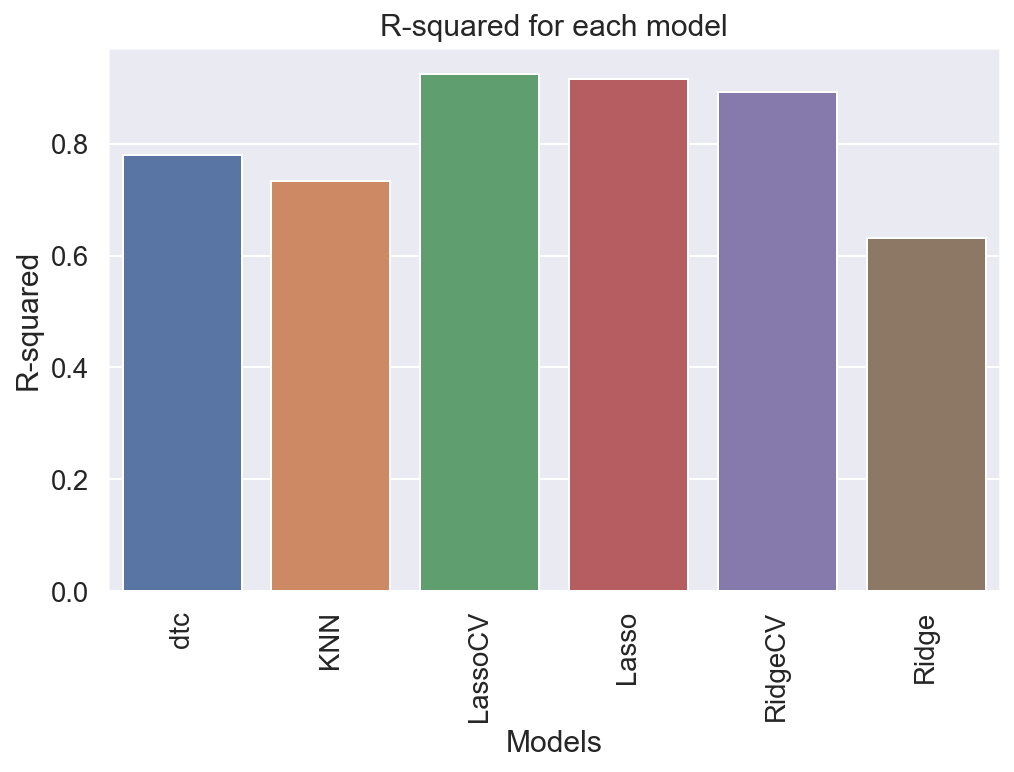

In [79]:
f, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation='90')
sns.barplot(x=evaluation['Model'], y=evaluation['R-squared (training)'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared for each model')


In this project, We were solving the problem of setting a house price based on the features of that house. We got the dataset of almost 3,000 houses in Iowa State along with 79 of their features. We splitted the data into train and test data. After that, we calculated the baseline by creating a model that predicts the house prices as a constant, which is the mean of all house prices in the train data. Then, we trained several models; Linear regresson after manually selecting the features, Lasso regression on the entire dataset, Ridge regression on the entire dataset, KNN regression, and decision tree regression. After that, we submitted the predictions of each model individually to Kaggle and got the score of each. The best score was for Lasso regression.<br>
For Lasso regression, which worked best for our dataset, here are the features that had the highest effects on the sale price of the houses:<br>
- OverallQual: Overall material and finish quality
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- FullBath: Full bathrooms above grade
- BsmtQual_Ex: Evaluation of the quality of the material on the exterior - Excellent
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date

In the end, we recommend that anyone considering getting a house to think about this list and priorities their options, because these are the features that have the strongest effects on the sale price <br>


This is Kaggle score we got for the best model
